# PCA를 이용해서 diabates 적용

## 1. 데이터 전처리

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\tbxjq\\Desktop\\가천대학교\\3학년 2학기\\딥러닝 응용\\Deep_learning_class\\data\\diabetes.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Diabetes or NOt')

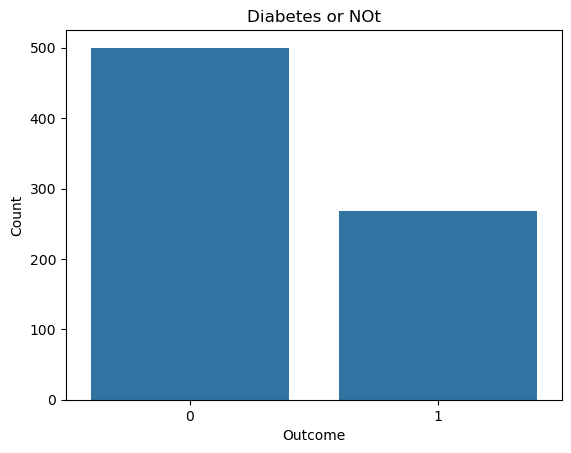

In [3]:
# 레이블 갯수 확인 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = data, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Diabetes or NOt")

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 결측치 제거

데이터에서 Pregnancies를 제외한 Glucose(혈당),BloodPressure(혈압),SkinThickness(피부 두께),Insulin,BMI 는 0이 존재해서는 안된다. 따라서 0이 있는 행을 평균값으로 대체한다. 평균값으로 대채

In [44]:
# input, target 으로 분리. outcome 을 target 으로 이진 분류 수행
input = data.drop('Outcome',axis=1)
target = data['Outcome']

print(input.shape)
input.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


**0인 값을 각 특성의 평균으로 대체**

In [6]:
# 대체할 열 리스트
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 0 값을 해당 열의 평균값으로 대체하는 코드
for column in columns_to_replace:
    # 열의 평균값 계산 (0을 제외하고 계산)
    mean_value = input[input[column] != 0][column].mean()

    # 0 값을 평균값으로 대체
    input[column] = input[column].replace(0, mean_value)

# 결과 확인
print(input[columns_to_replace].describe())


          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.435949      12.096346       8.790942   85.021108    6.875151
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.202592      29.153420  155.548223   32.400000
75%    140.250000      80.000000      32.000000  155.548223   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [7]:
input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [8]:
from sklearn.model_selection import train_test_split

train_input,test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)

## 2. 딥러닝 모델로 이진 분류 수행

### **Dense층으로 훈련**

In [10]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 이진 분류 모델이므로 손실함수는 binary_crossentropy 사용
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_input_scaled,train_target, epochs=50, batch_size=32,validation_split=0.1)

Epoch 1/50
18/18 [==============================] - 1s 24ms/step - loss: 0.6195 - accuracy: 0.6848 - val_loss: 0.6026 - val_accuracy: 0.7258
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.6938 - val_loss: 0.5593 - val_accuracy: 0.7258
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5371 - accuracy: 0.7192 - val_loss: 0.5236 - val_accuracy: 0.7419
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5100 - accuracy: 0.7572 - val_loss: 0.4992 - val_accuracy: 0.8065
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.4929 - accuracy: 0.7627 - val_loss: 0.4838 - val_accuracy: 0.8065
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7699 - val_loss: 0.4755 - val_accuracy: 0.7742
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7681 - val_loss: 0.4725 - val_accuracy: 0.7742
Epoch 8/50
18/18 [=

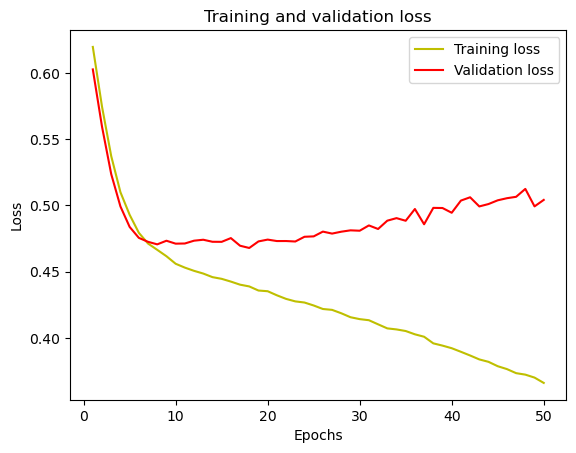

In [12]:

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

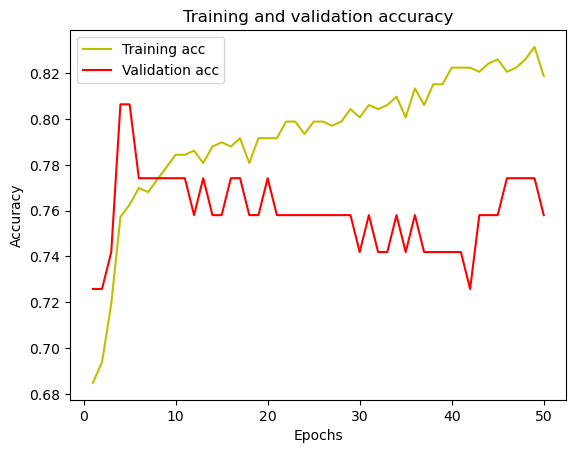

In [13]:


acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_input_scaled,test_target)

5/5 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7857


[0.4644191265106201, 0.7857142686843872]

### **과대적합이 발생하여 드랍아웃층을 추가**

In [16]:

from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [17]:
#조기 종료 사용시 fit 메서드에 callback=[early_stopping] prameter 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [18]:
history2 = model.fit(train_input_scaled,train_target, epochs=50, batch_size=32,validation_split=0.1)
     

Epoch 1/50
18/18 [==============================] - 1s 21ms/step - loss: 0.6658 - accuracy: 0.6395 - val_loss: 0.6193 - val_accuracy: 0.6452
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6504 - val_loss: 0.5935 - val_accuracy: 0.6452
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.6757 - val_loss: 0.5749 - val_accuracy: 0.6613
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5621 - accuracy: 0.6848 - val_loss: 0.5605 - val_accuracy: 0.6935
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5553 - accuracy: 0.6757 - val_loss: 0.5517 - val_accuracy: 0.7097
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.7047 - val_loss: 0.5437 - val_accuracy: 0.6935
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7156 - val_loss: 0.5375 - val_accuracy: 0.7097
Epoch 8/50
18/18 [=

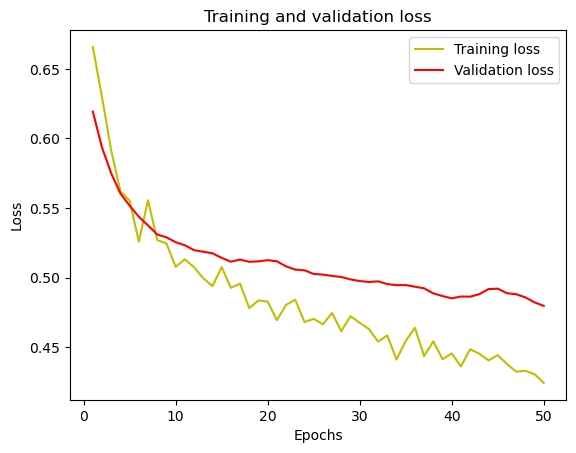

In [19]:

loss =history2.history['loss']
val_loss =history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

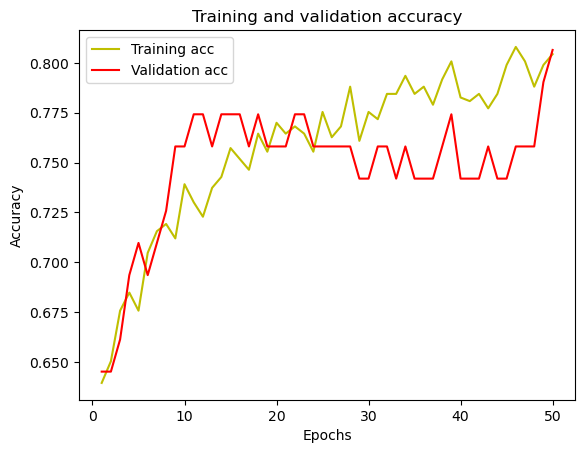

In [20]:

acc =history2.history['accuracy']
val_acc =history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
model.evaluate(test_input_scaled,test_target)
     

5/5 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7857


[0.46503379940986633, 0.7857142686843872]

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(test_input_scaled)

print(classification_report(test_target,pred.round()))
print(confusion_matrix(test_target,pred.round()))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154

[[79 20]
 [13 42]]


### **PCA 사용**

In [23]:
from sklearn.decomposition import PCA

# 2. PCA 적용 (train 데이터로만 fit, 주성분 2개)
pca = PCA(n_components=2)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)
# 4. 결과 확인
print("주성분 분석 결과 (PC1, PC2):\n", train_input_pca[:5])

# 각 주성분이 설명하는 분산 비율
print("설명된 분산 비율:", pca.explained_variance_ratio_)

주성분 분석 결과 (PC1, PC2):
 [[-0.0924478   0.96210127]
 [-0.15275711  1.00639306]
 [ 1.91807512  1.38098177]
 [ 0.63996079  1.70928083]
 [-2.98614199  0.34839728]]
설명된 분산 비율: [0.29244514 0.18104642]


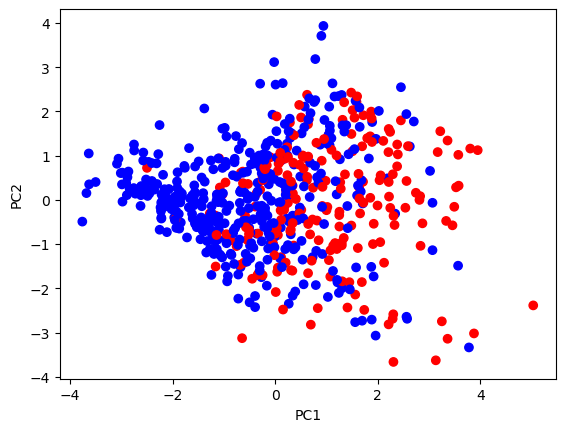

In [24]:

plt.scatter(train_input_pca[:,0],train_input_pca[:,1],c=train_target,cmap='bwr')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
# 모델 함수화
def model_fn(input_shape):
    model = Sequential()
    model.add(Dense(16,input_shape=input_shape,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [26]:
model_pca2 = model_fn((2,))
model_pca2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_pca2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                48        
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


In [27]:

model_pca2 = model_fn((2,))
model_pca2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_pca2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                48        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


In [28]:
pca2_history = model_pca2.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 [==============================] - 1s 27ms/step - loss: 0.7012 - accuracy: 0.4870 - val_loss: 0.6447 - val_accuracy: 0.7532
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.7264 - val_loss: 0.5916 - val_accuracy: 0.7468
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5783 - accuracy: 0.7296 - val_loss: 0.5491 - val_accuracy: 0.7532
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.7264 - val_loss: 0.5143 - val_accuracy: 0.7597
Epoch 5/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7313 - val_loss: 0.4968 - val_accuracy: 0.7662
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5124 - accuracy: 0.7296 - val_loss: 0.4910 - val_accuracy: 0.7597
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.7296 - val_loss: 0.4870 - val_accuracy: 0.7792
Epoch 8/30
20/20 [=

In [29]:

model_pca2.evaluate(test_input_pca,test_target)

5/5 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7727


[0.48275643587112427, 0.7727272510528564]

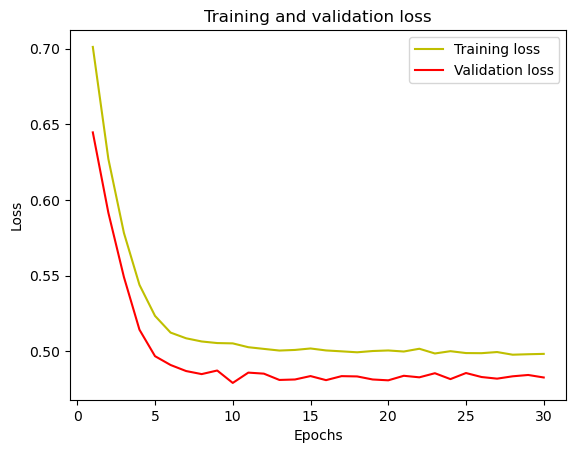

In [30]:
loss =pca2_history.history['loss']
val_loss =pca2_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

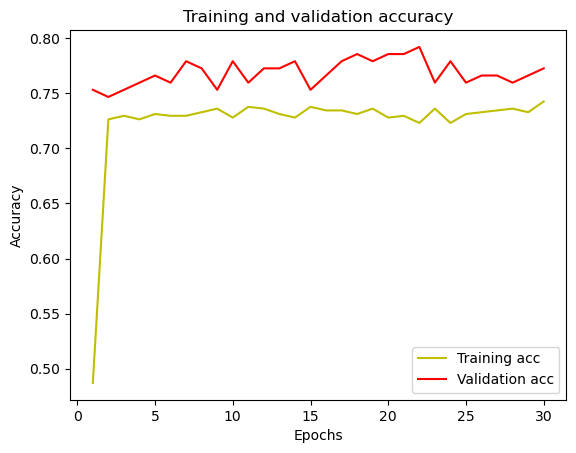

In [31]:
acc =pca2_history.history['accuracy']
val_acc =pca2_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**n=3 일때 PCA**

주성분 분석 결과 (PC1, PC2,PC3):
 [[-0.0924478   0.96210127  0.75319515]
 [-0.15275711  1.00639306 -1.32938433]
 [ 1.91807512  1.38098177 -0.48556412]
 [ 0.63996079  1.70928083  1.49320126]
 [-2.98614199  0.34839728  0.55307773]]


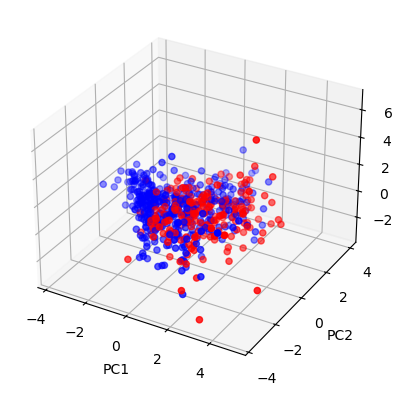

(614, 3)


In [32]:
from mpl_toolkits.mplot3d import Axes3D

# 2. PCA 적용 (train 데이터로만 fit, 주성분 3개)
pca = PCA(n_components=3)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_input_pca[:,0],train_input_pca[:,1],train_input_pca[:,2],c=train_target,cmap='bwr')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

print(train_input_pca.shape)

In [33]:

# 모델 학습
pca3_model = model_fn((3,))
pca3_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca3_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                64        
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [34]:
pca3_history = pca3_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))
     

Epoch 1/30
20/20 [==============================] - 1s 19ms/step - loss: 0.6139 - accuracy: 0.6547 - val_loss: 0.5853 - val_accuracy: 0.6623
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5593 - accuracy: 0.6938 - val_loss: 0.5366 - val_accuracy: 0.7143
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5253 - accuracy: 0.7280 - val_loss: 0.5094 - val_accuracy: 0.7338
Epoch 4/30
20/20 [==============================] - 0s 8ms/step - loss: 0.5061 - accuracy: 0.7590 - val_loss: 0.4930 - val_accuracy: 0.7468
Epoch 5/30
20/20 [==============================] - 0s 7ms/step - loss: 0.4970 - accuracy: 0.7590 - val_loss: 0.4844 - val_accuracy: 0.7857
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7638 - val_loss: 0.4765 - val_accuracy: 0.7857
Epoch 7/30
20/20 [==============================] - 0s 5ms/step - loss: 0.4874 - accuracy: 0.7622 - val_loss: 0.4690 - val_accuracy: 0.7792
Epoch 8/30
20/20 [=

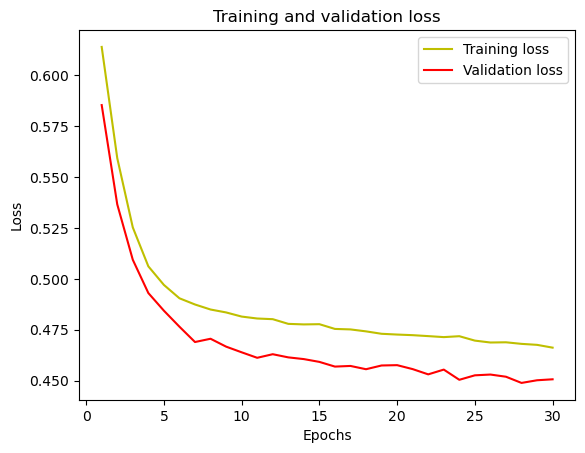

In [35]:

loss =pca3_history.history['loss']
val_loss =pca3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

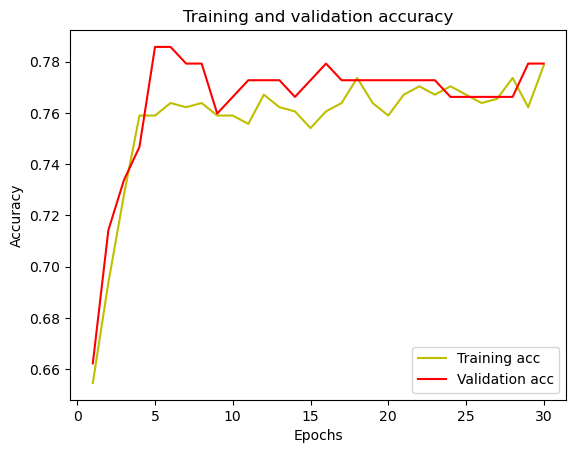

In [36]:
acc =pca3_history.history['accuracy']
val_acc =pca3_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
pca3_model.evaluate(test_input_pca,test_target)

5/5 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7792


[0.45066744089126587, 0.7792207598686218]

In [38]:
# 1. PCA 적용 (train 데이터로만 fit, 주성분 5개)
pca = PCA(n_components=5)
train_input_pca = pca.fit_transform(train_input_scaled)

# 2. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])
print(train_input_pca.shape)

주성분 분석 결과 (PC1, PC2,PC3):
 [[-0.0924478   0.96210127  0.75319515  2.46741881  0.52133092]
 [-0.15275711  1.00639306 -1.32938433  0.12458584 -0.51516339]
 [ 1.91807512  1.38098177 -0.48556412  0.829952    0.84564774]
 [ 0.63996079  1.70928083  1.49320126  0.45591664  0.54994361]
 [-2.98614199  0.34839728  0.55307773  0.8193947  -0.24062027]]
(614, 5)


In [39]:
pca5_model = model_fn((5,))
pca5_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                96        
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [40]:
pca5_history = pca5_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))
     

Epoch 1/30
20/20 [==============================] - 1s 21ms/step - loss: 0.7169 - accuracy: 0.4023 - val_loss: 0.6861 - val_accuracy: 0.6558
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6840 - val_loss: 0.6479 - val_accuracy: 0.6948
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6205 - accuracy: 0.6889 - val_loss: 0.6151 - val_accuracy: 0.6948
Epoch 4/30
20/20 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.7052 - val_loss: 0.5765 - val_accuracy: 0.7078
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5556 - accuracy: 0.7248 - val_loss: 0.5424 - val_accuracy: 0.7273
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.7280 - val_loss: 0.5206 - val_accuracy: 0.7597
Epoch 7/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7394 - val_loss: 0.5067 - val_accuracy: 0.7532
Epoch 8/30
20/20 [=

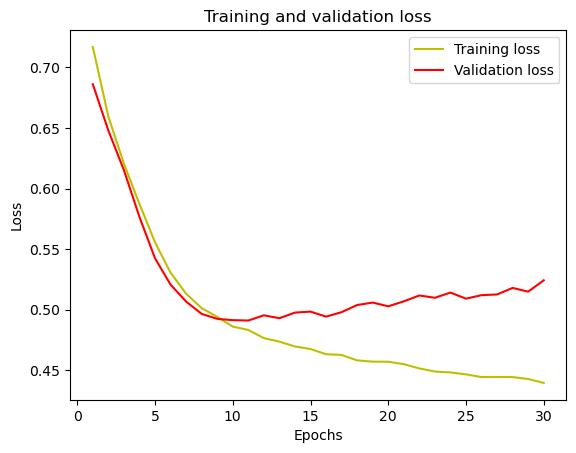

In [41]:
loss =pca5_history.history['loss']
val_loss =pca5_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

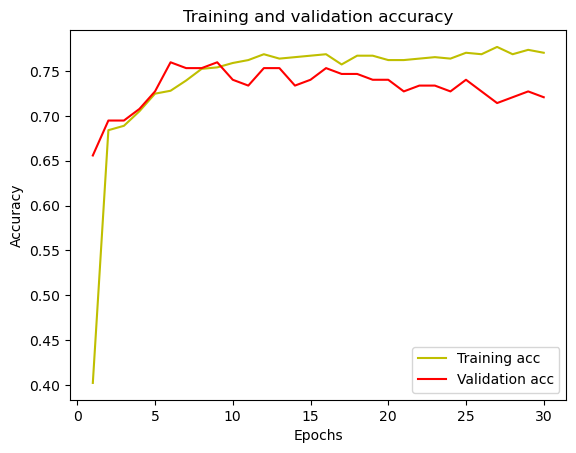

In [42]:
acc =pca5_history.history['accuracy']
val_acc =pca5_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
pca5_model.evaluate(test_input_pca,test_target)

5/5 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7208


[0.5242032408714294, 0.7207792401313782]

* n=2 pca:0.7727
* n=3 pca:0.7792
* n=5 pca:0.7207